<a href="https://colab.research.google.com/github/Lou1108/DeepLearning/blob/main/laser_prediction_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, GRU, LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## Data Loading

In [125]:
data_train = loadmat('/content/drive/MyDrive/Deep Learning/Xtrain.mat')['Xtrain']
data_test = loadmat('/content/drive/MyDrive/Deep Learning/Xtest.mat')['Xtest']
#As requested in point a) we scale the data, preparing it for the neural network.
scaler = MinMaxScaler(feature_range=(0, 1))
data_train_scaled = scaler.fit_transform(data_train)
y_test = scaler.transform(data_test)

Converting time series into supervised learning format. It uses a sliding window (time_step) for one-step-ahead prediction

In [126]:
def create_dataset(data, time_step): #supervised format
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [127]:
X, y = create_dataset(data_train_scaled, 120)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Model Training
Training 3 different models (RNN, LSTM, and GRU) on the given test data to compare the errors.

Trying different time steps, as requested in point b) to tune for each of the different models the best performance and of all models the best one.

In [128]:
time_steps=list(range(1, 151, 25))
results_RNN = []
print("Training the RNN")
for ts in time_steps:
    X, y = create_dataset(data_train_scaled, ts)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model_rnn = Sequential()
    model_rnn.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model_rnn.add(SimpleRNN(units=100))
    model_rnn.add(Dense(units=1))
    early_stop = EarlyStopping(monitor='loss', patience=5)
    model_rnn.compile(optimizer='adam', loss='mean_squared_error')

    model_rnn.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[early_stop])

    predictions = model_rnn.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    mse = mean_squared_error(y_test_scaled, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_scaled, predictions)
    results_RNN.append([ts, mse, rmse, mae])

results_LSTM=[]
print("Training the LSTM")
for ts in time_steps:
    X, y = create_dataset(data_train_scaled, ts)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model_lstm.add(LSTM(units=50))
    model_lstm.add(Dense(units=1))

    early_stop = EarlyStopping(monitor='loss', patience=5)
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')
    model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[early_stop])

    predictions = model_lstm.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    mse = mean_squared_error(y_test_scaled, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_scaled, predictions)
    results_LSTM.append([ts, mse, rmse, mae])

results_GRU = []
print("Training the GRU")
for ts in time_steps:
  X, y = create_dataset(data_train_scaled, ts)
  X = X.reshape(X.shape[0], X.shape[1], 1) #3D reshaping

  train_size = int(len(X) * 0.8)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]

  model_GRU = Sequential()
  model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
  model_GRU.add(GRU(units=50))
  model_GRU.add(Dense(units=1))
  model_GRU.compile(optimizer='adam', loss='mean_squared_error')
  early_stop = EarlyStopping(monitor='loss', patience=5)
  model_GRU.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[early_stop])

  predictions = model_GRU.predict(X_test)
  predictions = scaler.inverse_transform(predictions)
  y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

  mse = mean_squared_error(y_test_scaled, predictions)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test_scaled, predictions)
  results_GRU.append([ts, mse, rmse, mae])


Training the RNN
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0428
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0257
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0278
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0295
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0260
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0233
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0247
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0268
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0254
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0247
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0274
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0265
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0266
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0244
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1290
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0118
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0071
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0095
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0079
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0092
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0082
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0047
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0072
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0060
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0073
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0073
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0061
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0049
Epoch 16/50
25/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3146
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0118
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0099
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0087
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0072
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0080
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0072
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0079
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0073
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0069
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0071
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0062
Epoch 16/50
24/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1712
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0173
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0606
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0148
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0082
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0091
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0069
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0279
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1828
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0610
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0854
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0683
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1201
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0181
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0084
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0113
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0098
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0133
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0084
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0077
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0090
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0079
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0070
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0072
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0103
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0065
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0072
Epoch 16/50
23/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.1282
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0228
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0149
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0158
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0128
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0120
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0138
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0099
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0117
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0098
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0088
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0091
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0121
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0086
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0071
Epoch 16/50
22/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0667
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0343
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0296
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0271
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0279
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0255
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0254
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0269
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0257
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0274
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0299
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0236
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0262
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0249
Epoch 16/50
25/25 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0567
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0354
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0335
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0354
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0283
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0294
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0173
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0151
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0097
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0100
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0081
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109
Epoch 16/50
25/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0477
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0376
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0320
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0309
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0263
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0200
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0152
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0152
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0183
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0126
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0129
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0124
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0110
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0119
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0121
Epoch 16/50
24/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0574
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0384
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0335
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0330
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0304
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0296
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0247
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0217
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0170
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0157
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0211
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0174
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0130
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0128
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0117
Epoch 16/50
24/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0440
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0352
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0353
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0306
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0316
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0290
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0211
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0160
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0163
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0153
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0157
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0126
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0122
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0129
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0150
Epoch 16/50
23/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0476
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0356
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0345
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0338
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0371
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0298
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0235
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0136
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0163
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0155
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0148
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0152
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0118
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0120
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0121
Epoch 16/50
22/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0658
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0275
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0232
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0252
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0262
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0246
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0263
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0267
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0293
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0251
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0260
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0273
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0271
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0245
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0243
Epoch 16/50
25/25 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0564
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0337
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0221
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0130
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0128
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0121
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0098
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0115
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0093
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0074
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0072
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0063
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0043
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0030
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0040
Epoch 16/50
25/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0584
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0410
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0295
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0213
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0128
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0119
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0116
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0123
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0093
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0080
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0096
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0071
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0058
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0057
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0042
Epoch 16/50
24/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0621
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0386
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0335
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0259
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0173
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0099
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0143
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0123
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0105
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0104
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0071
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0054
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0051
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0052
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0036
Epoch 16/50
24/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0502
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0358
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0262
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0137
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0134
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0112
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0125
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0113
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0100
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0086
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0085
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0063
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0041
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0050
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0040
Epoch 16/50
23/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0413
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0329
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0246
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0163
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0123
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0130
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0102
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0116
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0117
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0094
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0083
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0072
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0059
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0035
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0036
Epoch 16/50
22/

### Results of the model training
For finetuning the window size

In [129]:
# display the results of all three models
df_rnn = pd.DataFrame(results_RNN, columns=["time_step", "MSE", "RMSE", "MAE"])
df_lstm = pd.DataFrame(results_LSTM, columns=["time_step", "MSE", "RMSE", "MAE"])
df_gru = pd.DataFrame(results_GRU, columns=["time_step", "MSE", "RMSE", "MAE"])

print("RNN results:\n", df_rnn)
print("\nLSTM results:\n", df_lstm)
print("\nGRU results:\n", df_gru)

RNN results:
    time_step          MSE       RMSE        MAE
0          1  1392.501032  37.316230  29.988958
1         26   121.701070  11.031821   8.351682
2         51    50.316503   7.093413   5.896853
3         76  5268.681186  72.585682  64.092374
4        101    91.750652   9.578656   7.096744
5        126   288.373224  16.981555  12.981300

LSTM results:
    time_step          MSE       RMSE        MAE
0          1  1296.949283  36.013182  29.307716
1         26    31.664432   5.627116   4.943254
2         51    10.662204   3.265303   2.761140
3         76    40.569902   6.369451   4.963788
4        101    38.330531   6.191166   5.120317
5        126    18.637624   4.317132   3.318782

GRU results:
    time_step          MSE       RMSE        MAE
0          1  1279.263154  35.766788  28.899816
1         26    10.063376   3.172282   2.304188
2         51    11.704253   3.421148   2.700040
3         76    40.060379   6.329327   4.689979
4        101    29.531680   5.434306   4.51

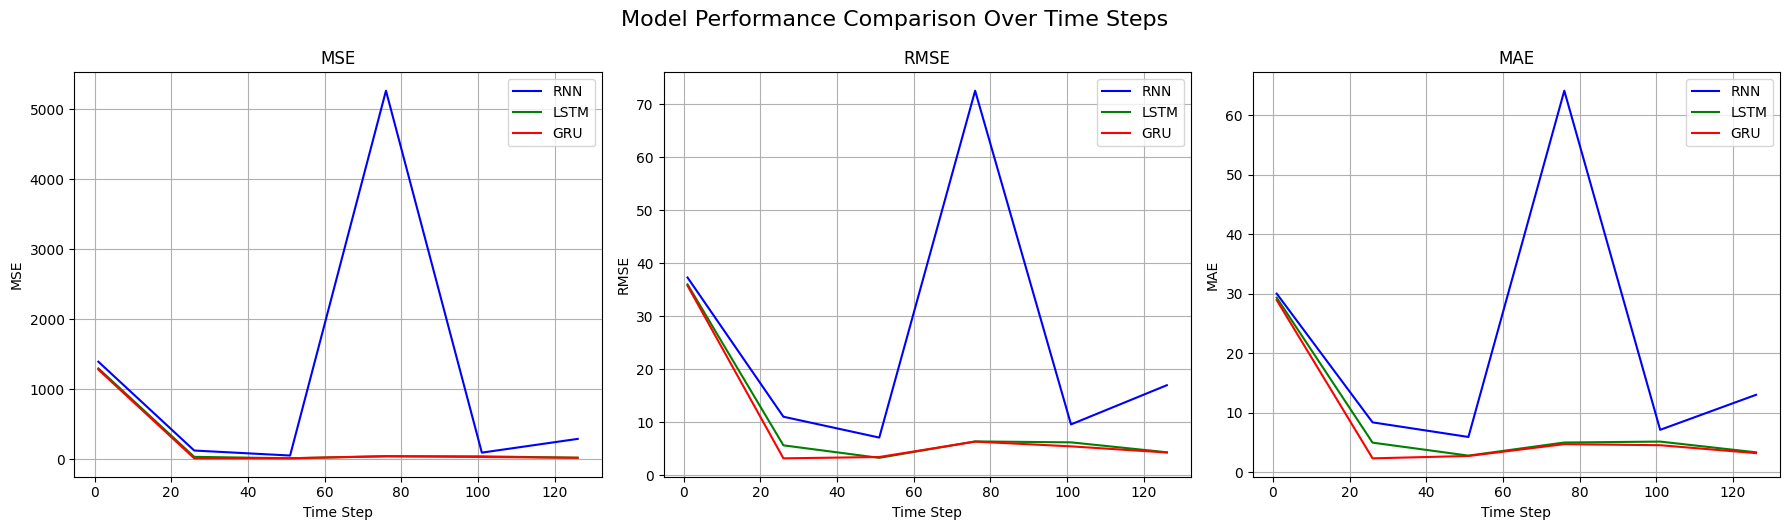

In [130]:
# create mappings for models
models = {"RNN": df_rnn, "LSTM": df_lstm, "GRU": df_gru}
colors = {"RNN": "blue", "LSTM": "green", "GRU": "red"}

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
for idx, metric in enumerate(["MSE", "RMSE", "MAE"]):
    ax = axes[idx]
    for model_name, df in models.items():
        ax.plot(df["time_step"], df[metric], label=model_name, color=colors[model_name])
    ax.set_title(metric)
    ax.set_xlabel("Time Step")
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.suptitle("Model Performance Comparison Over Time Steps", fontsize=16, y=1.05)
plt.savefig("ModelPerformanceComparison.jpg")
plt.show()

### Fine-tuning the window size for GRU

In [132]:
time_steps=list(range(25, 106, 10))
results_GRU = []
print("GRU")
for ts in time_steps:
  X, y = create_dataset(data_train_scaled, ts)
  X = X.reshape(X.shape[0], X.shape[1], 1) #3D reshaping

  train_size = int(len(X) * 0.8)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]

  model_GRU = Sequential()
  model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
  model_GRU.add(GRU(units=50))
  model_GRU.add(Dense(units=1))
  model_GRU.compile(optimizer='adam', loss='mean_squared_error')
  early_stop = EarlyStopping(monitor='loss', patience=5)
  model_GRU.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

  predictions = model_GRU.predict(X_test)
  predictions = scaler.inverse_transform(predictions)
  y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

  mse = mean_squared_error(y_test_scaled, predictions)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test_scaled, predictions)
  results_GRU.append([ts, mse, rmse, mae])

df_gru = pd.DataFrame(results_GRU, columns=["time_step", "MSE", "RMSE", "MAE"])

print("\nGRU results:\n", df_gru)

GRU
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0503
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0367
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0221
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0152
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0116
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0124
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0118
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0108
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0087
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0081
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0046
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0035
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0039
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0524
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0380
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0254
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0157
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0133
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0111
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0099
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0063
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0044
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0046
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0046
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0463
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0341
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0254
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0143
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0121
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0115
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0118
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0123
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0109
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0102
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0083
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0071
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0055
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0043
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0046
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0537
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0381
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0319
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0202
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0144
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0107
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0104
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0111
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0119
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0097
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0068
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0073
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0057
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0057
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0036
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0677
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0402
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0289
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0186
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0141
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0117
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0101
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0106
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0095
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0102
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0074
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0050
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0050
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0038
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0030
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0566
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0350
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0283
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0184
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0134
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0109
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0111
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0110
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0111
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0104
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0108
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0075
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0083
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0064
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0048
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.0604
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0407
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0303
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0160
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0146
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0113
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0116
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0115
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0104
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0087
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0080
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0069
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0076
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0039
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0056
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0445
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0339
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0248
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0120
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0128
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0119
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0119
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0103
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0095
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0084
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0063
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0052
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0043
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0029
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0045
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.0503
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0369
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0308
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0180
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0120
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0132
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0113
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0103
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0102
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0100
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0070
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0059
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0055
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0030
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0032
E

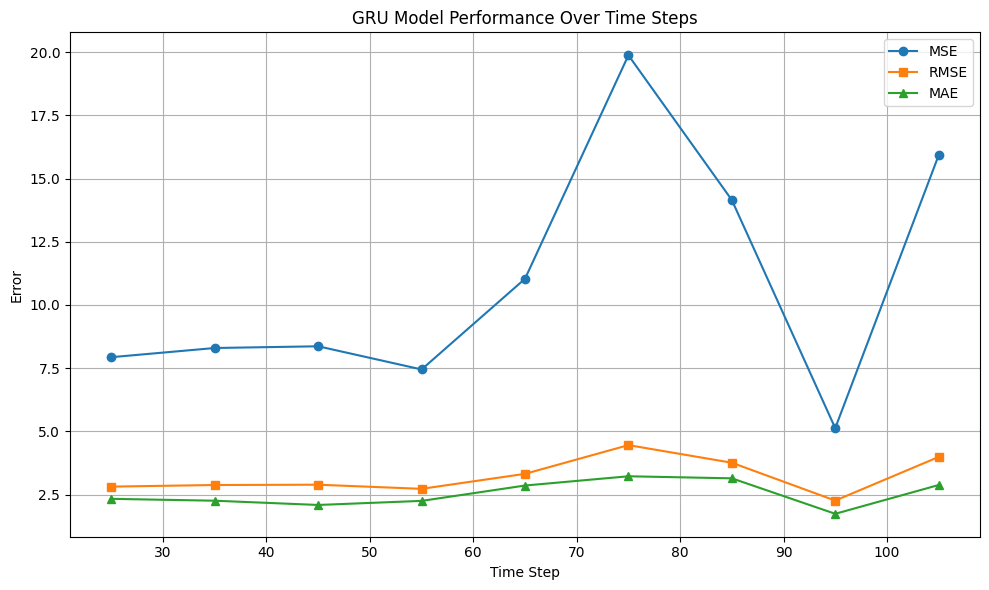

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(df_gru["time_step"], df_gru["MSE"], marker='o', label='MSE')
plt.plot(df_gru["time_step"], df_gru["RMSE"], marker='s', label='RMSE')
plt.plot(df_gru["time_step"], df_gru["MAE"], marker='^', label='MAE')

plt.title("GRU Model Performance Over Time Steps")
plt.xlabel("Time Step")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("GRUPerformance.jpg")
plt.show()

## Train GRU model on the best hyperparameters

In [134]:
best_ts=95
X_train, y_train = create_dataset(data_train_scaled, best_ts) #with the best fine-tuned time step = 125
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [135]:
# Define and compile the model
model_GRU = Sequential()
model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_GRU.add(GRU(units=50))
model_GRU.add(Dense(units=1))
model_GRU.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
early_stop = EarlyStopping(monitor='loss', patience=5)
model_GRU.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0513
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0294
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0208
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0131
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0101
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0108
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0099
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0095
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0075
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0055
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0042
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0038
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0033
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0043
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0025
E

<ipython-input-136-ebae833b3b08>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


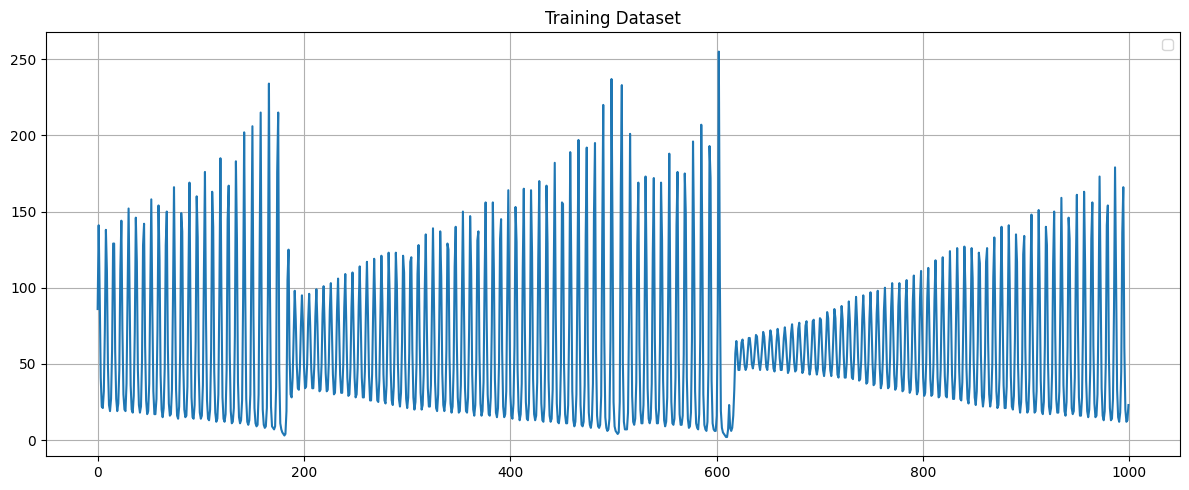

In [136]:
plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(data_train)), data_train)
plt.legend()
plt.title("Training Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()

## Recursive prediction
As stated in assignment c, the best model (GRU) is used to predict 200 steps recursively using the previsouly determined best time-step.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

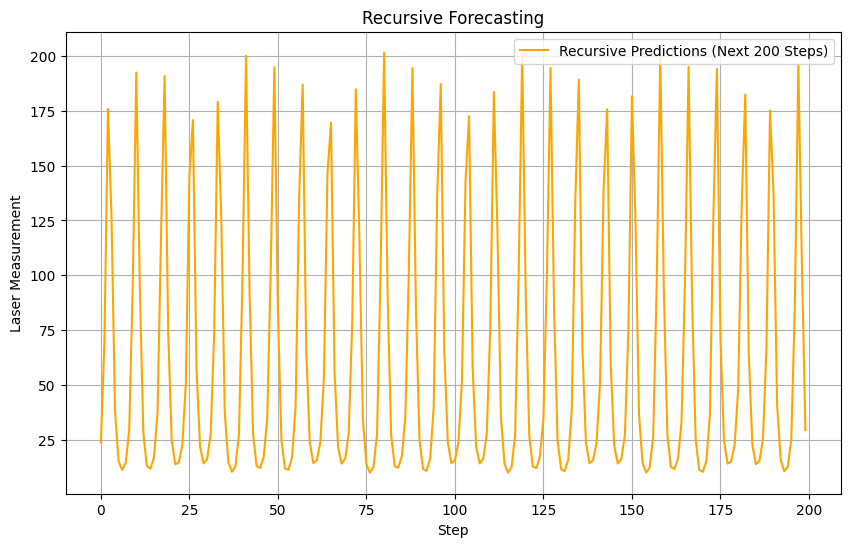

In [137]:
time_step = 50
last_input = y_train[-time_step:].reshape(1, time_step, 1)

# Step 3: Recursive prediction for 200 steps
recursive_preds = []
for _ in range(200):
    next_pred = model_GRU.predict(last_input)[0, 0]
    recursive_preds.append(next_pred)
    last_input = np.append(last_input[:, 1:, :], [[[next_pred]]], axis=1)

recursive_preds_scaled = scaler.inverse_transform(np.array(recursive_preds).reshape(-1, 1))

plt.figure(figsize=(10,6))
plt.plot(recursive_preds_scaled, label='Recursive Predictions (Next 200 Steps)', color='orange')
plt.title('Recursive Forecasting')
plt.xlabel('Step')
plt.ylabel('Laser Measurement')
plt.legend()
plt.grid(True)
plt.show()

plot to show the last 150 known values from the test set (in blue) followed by the 200 recursively predicted future steps (in orange).

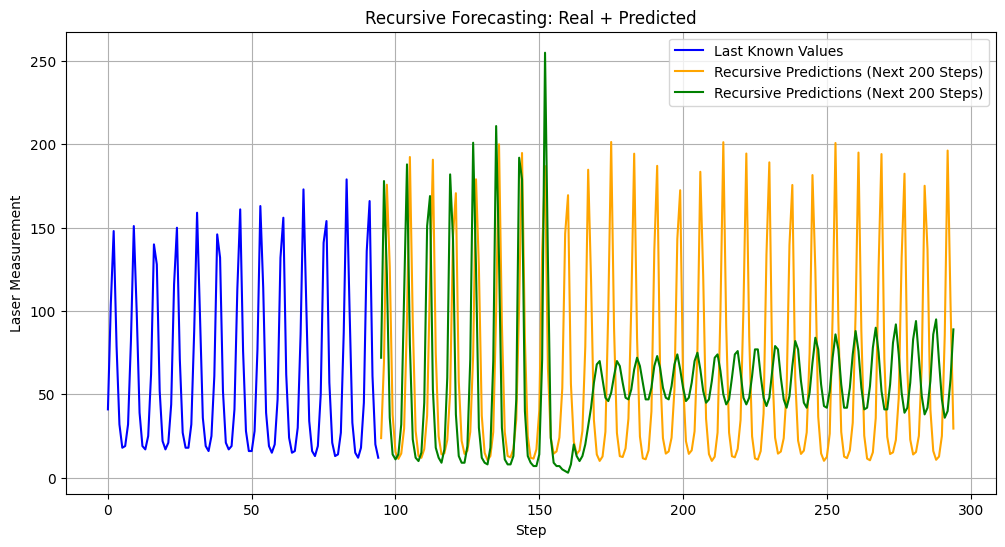

In [138]:
true_window = scaler.inverse_transform(X_train[-1].reshape(-1, 1))
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(true_window)), true_window, label="Last Known Values", color='blue')
plt.plot(np.arange(len(true_window), len(true_window) + len(recursive_preds_scaled)),
         recursive_preds_scaled, label="Recursive Predictions (Next 200 Steps)", color='orange')
plt.plot(np.arange(len(true_window), len(true_window) + len(recursive_preds_scaled)),
         data_test, label="Recursive Predictions (Next 200 Steps)", color='green')
plt.xlabel("Step")
plt.ylabel("Laser Measurement")
plt.title("Recursive Forecasting: Real + Predicted")
plt.legend()
plt.grid(True)
plt.savefig("RecursiveForecastingRealANDPredicted.jpg")
plt.show()

In [139]:
mae = np.mean(np.abs(recursive_preds_scaled - data_test))
mse = np.mean((recursive_preds_scaled - data_test) ** 2)
print("MAE:", mae)
print("MSE:", mse)

MAE: 49.173065
MSE: 4012.637


GRU with harmonic time encoding

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0958
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0479
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0455
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0411
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0381
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0364
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0284
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0288
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0285
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0238
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0200
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0184
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0168
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0153
Epoch 15/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0145
E

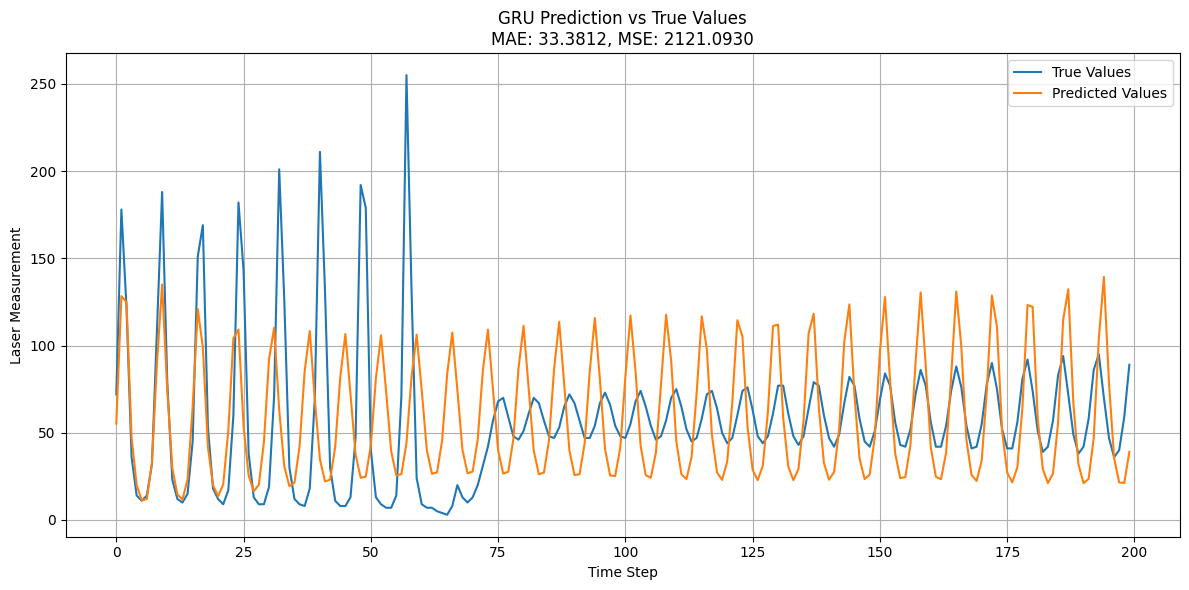

In [141]:
train_scaled = scaler.fit_transform(data_train.reshape(-1, 1)).flatten()
window_size = 50
period = 400

# Create input sequences
def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        t = np.arange(i, i + window)
        sin_t = np.sin(2 * np.pi * t / period)
        cos_t = np.cos(2 * np.pi * t / period)
        sin2_t = np.sin(4 * np.pi * t / period)
        cos2_t = np.cos(4 * np.pi * t / period)
        seq = np.vstack((data[i:i+window], sin_t, cos_t, sin2_t, cos2_t)).T
        X.append(seq)
        y.append(data[i + window])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, window_size)

model = Sequential([
    GRU(64, return_sequences=True, input_shape=(window_size, 5)),
    Dropout(0.2),
    GRU(32),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

input_seq = train_scaled[-window_size:].copy()
predictions = []

for i in range(200):
    t = np.arange(len(train_scaled) + i - window_size, len(train_scaled) + i)
    sin_t = np.sin(2 * np.pi * t / period)
    cos_t = np.cos(2 * np.pi * t / period)
    sin2_t = np.sin(4 * np.pi * t / period)
    cos2_t = np.cos(4 * np.pi * t / period)
    input_features = np.vstack((input_seq, sin_t, cos_t, sin2_t, cos2_t)).T.reshape(1, window_size, 5)
    pred = model.predict(input_features, verbose=0)[0, 0]
    predictions.append(pred)
    input_seq = np.append(input_seq, pred)[-window_size:]

print("Sample raw predictions:", predictions[:5])

# Clip predictions to [0, 1] to avoid inverse scaling distortions
pred_clipped = np.clip(predictions, 0, 1)
predicted_values = scaler.inverse_transform(np.array(pred_clipped).reshape(-1, 1)).flatten()

# Use original test values directly (already in real scale)
true_values = data_test.flatten()

# Evaluation
mae = np.mean(np.abs(predicted_values - true_values))
mse = np.mean((predicted_values - true_values) ** 2)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(true_values, label='True Values')
plt.plot(predicted_values, label='Predicted Values')
plt.title(f'GRU Prediction vs True Values\nMAE: {mae:.4f}, MSE: {mse:.4f}')
plt.xlabel('Time Step')
plt.ylabel('Laser Measurement')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
